# Lab 1
Today: 
1. Linear regression
1. Overview of Pandas library: creation, exploration and vizualization of the data
1. Hypothesis testing: parametric vs non parametric, paired vs non paired

# Step 1. Linear regression

We first create a fake dataset with some random noise

In [4]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

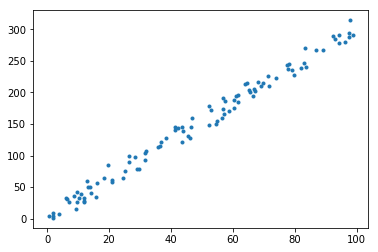

In [2]:
np.random.seed(0) # fix seed for reproducability
x = np.random.uniform(0., 100., 100) # np.random.uniform(low, high, n)
y = 3. * x + 2. + np.random.normal(0., 10., 100) # np.random.normal(mean, sigma, n)
plt.plot(x, y, '.');

Add column of 1's for intercept.

In [3]:
import statsmodels.api as sm
# add constant for intercept
x = sm.add_constant(x)

Use statsmodels implementation of Ordinary Least Squares.

In [4]:
model = sm.OLS(y,x)
res = model.fit()
print(res.params)
print(res.rsquared)

[ 4.22151077  2.9936935 ]
0.986852382137


Let's now plot the line along with the error (+/- sigma).

In [36]:
def line(x, a, b):
    return a * x + b
e = np.repeat(10., 100)
plt.errorbar(x[:,1], y, yerr=e, fmt="none")
xfine = np.linspace(0., 100., 100)  # define values to plot the function for
plt.plot(xfine, line(xfine, res.params[1], res.params[0]), 'r-');

TypeError: list indices must be integers, not tuple

### Exercise 1
1. Implement closed formula solution fo the parameters of Linear Regression (from lecture notes). 
1. Implement formula for coefficient of determination (R-squared)

Feel free to use any library, as default - use [numpy.linalg](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html).

Compare results with OLS method.

[[1, 2], [3, 9], [5, 9], [6, 11], [7, 14], [9, 15]]
[1, 3, 5, 6, 7, 9]
[2, 9, 9, 11, 14, 15]
[373 708]


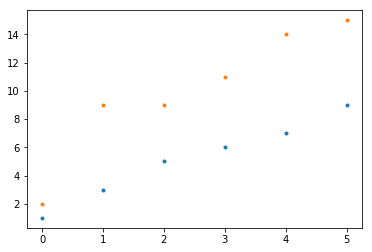

In [49]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


x = [[1,2],
    [3 ,9],
    [5 ,9],
    [6,11],
    [7 ,14],
    [9 ,15]]

print x

error = [[0,0,0,0,0,0],
         [0,0,0,0,0,0]]

# iterate through rows
for i in range(len(x)):
   # iterate through columns
   for j in range(len(x[0])):
       error[j][i] = x[i][j]

for r in error:
   print(r)
y= np.dot(r,x)
print y
plt.plot(x, '.');


In [ ]:
# here goes your solution for R-squared

# Step 2. Data representation and interaction

**Pandas** in an open-source python package that is great for data structuring, preparation and analysis.

Features:
- Unified data representation using *DataFrame* objects - 2D heterogeneous tables with labeled axes;
- Database-like operations: join, union(append), group by, sort, column selection, filtering;
- Advanced operations: pivoting, reshaping, multi-indexing;
- Basic statistics: count, mean, std, min/max, quantiles;
- Vizualization with matplotlib.

## 1. Dataframe creation
Create dataframe by reading a csv file with brain size data (analyzed [here](https://www.researchgate.net/profile/Robert_Schultz2/publication/222881180_In_vivo_brain_size_and_intelligence_Intelligence_15_223-228/links/00b4952d94932772d4000000.pdf)).
The csv contains following columns:
1. Gender: Male or Female
1. FSIQ: Full Scale IQ scores 
1. VIQ: Verbal IQ scores 
1. PIQ: Performance IQ scores 
1. Weight: body weight in pounds
1. Height: height in inches
1. MRI_Count: total pixel Count from the 18 MRI scans

In [ ]:
import pandas as pd
data = pd.read_csv('examples/brain_size.csv', sep=';', na_values=".")
data

It is also possible to create dataset from dictionary

In [ ]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [ ]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

## 2. Data exploration
Let's consider simple operations to operate with dataframe.

In [ ]:
data.shape

In [ ]:
data.columns

To get one column from DataFrame it is possible to use `[]` with the column name.

In [ ]:
data['Gender'] 

You can also use boolean indexing to filter rows. For example to compute the *mean value* of verbal IQ score for females it is possible to use the following line:

In [ ]:
data[data['Gender'] == 'Female']['VIQ'].mean()

To get simple statistics for each column use `descibe` function:

In [ ]:
data.describe()

The `groupby` operation allows to split dataframe into groups. 

It returns `GroupBy` object which can be used to apply a function for each group separately ([more](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-grouping) documentation on grouping).

In [ ]:
groupby_gender = data.groupby('Gender')
groupby_gender['VIQ'].mean()

In [ ]:
groupby_gender.mean()

### Exercise 2
	•	What is the mean value for VIQ for the full population?
	•	How many males/females were included in this study? 
	•	What is the average value of MRI counts expressed in log units, for males and females?
**Hint**: use ‘tab completion’ to find out the methods that can be called, instead of `mean` in the above example.

In [ ]:
# print mean VIQ for the full population


In [ ]:
# print the numbers of males and females


In [ ]:
# print average MRI counts in log units for each gender


## 3. Data visualization
Let's use pandas plotting to make simple boxplots and 3x3 matrix of scatter plots for 3 columns.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Box plots of different columns for each gender
groupby_gender = data.groupby('Gender')
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
plt.show()

In [ ]:
scatter_matrix(data[['FSIQ', 'VIQ', 'PIQ']])
plt.show()

### Exercise 3

Plot the scatter matrix for males only, and for females only. 

In [ ]:
# scatter matrix for males 


In [ ]:
# scatter matrix for females 


# Step 3. Hypothesis testing: comparing two groups

Simple statistical test can be done using `scipy.stats` package (see [more](http://www.scipy-lectures.org/intro/scipy.html#scipy)).

In [ ]:
from scipy import stats

Student’s t-test: the simplest statistical test
=========

1-sample t-test: testing the value of a population mean
------

![norm](http://www.scipy-lectures.org/_images/two_sided.png)

`scipy.stats.ttest_1samp()` tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean).

It returns the T-statistic, and the p-value (see [more](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp)):


In [ ]:
stats.ttest_1samp(data['VIQ'], 0) 

**Tip**: With a p-value of $10^{-28}$ we can claim that the population mean for the verbal IQ score is not 0.



2-sample t-test: testing for difference across populations
--------

We have seen above that the mean `VIQ` in the male and female populations were different. To test if this is significant, we do a 2-sample t-test with `scipy.stats.ttest_ind()`:


In [ ]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)   

Can we claim that male and female mean value of `VIQ` are significantly different?

Paired tests: repeated measurements on the same individuals
------
`PIQ`, `VIQ`, and `FSIQ` give 3 measures of IQ. Let us test if `FSIQ` and `PIQ` are significantly different. We can again use a 2 sample test:

In [ ]:
data.boxplot(column=['FSIQ', 'PIQ']);

In [ ]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

The problem with this approach is that it forgets that there are links between observations: FSIQ and PIQ are measured on the same individuals. Thus the variance due to inter-subject variability is confounding, and can be removed, using a “paired test”, or “repeated measures test”:


In [ ]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])   

In [ ]:
data['dd'] = data['FSIQ'] - data['PIQ']
data.boxplot(column=['dd']);

This is equivalent to a 1-sample test on the difference:

In [ ]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)   

T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption:

In [ ]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])  

**Note**: The corresponding test in the non-paired case is the Mann–Whitney U test,  `scipy.stats.mannwhitneyu()`.

### Exercise 4
	•	Test the difference between weights in males and females.
	•	Test the difference between VIQ in males and females without the assumption of Gaussian error.

In [ ]:
# difference in weigth between genders?


In [ ]:
# difference in VIQ between genders (don't assume Gaussian errors)
